In [47]:
## https://elitedatascience.com/imbalanced-classes
import pandas as pd
import numpy as np

df = pd.read_csv('balance-scale.data.txt',
                names=['balance','var1','var2','var3','var4'])

df.head()


,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [48]:
%pwd

'C:\\Users\\prassha\\Desktop\\MachineLearning\\Python\\ImbalanceData'

In [49]:
df.balance.value_counts()  # df['balance'].value_counts()  ## both are same

L    288
R    288
B     49
Name: balance, dtype: int64

In [50]:
df.balance = [1 if b == 'B' else 0 for b in df.balance]
df.balance.value_counts()

0    576
1     49
Name: balance, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
y = df.balance
X = df.drop('balance', axis =1)
clf_0 = LogisticRegression().fit(X,y)
pred_y_0 = clf_0.predict(X)


In [52]:
print("Accuracy_score::", accuracy_score(pred_y_0,y))

Accuracy_score:: 0.9216


In [53]:
print("np.unique(pred_y_0)::", np.unique(pred_y_0))

np.unique(pred_y_0):: [0]


In [54]:
##As you can see, this model is only predicting 0, which means it's completely ignoring 
##the minority class in favor of the majority class.

1. Up-sample Minority Class

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

1.First, we'll separate observations from each class into different DataFrames

2.Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.

3.Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [14]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.balance == 0]
df_minority = df[df.balance == 1]

# Upsample minority class
df_minority_upsample = resample(df_minority,
                               replace=True,
                               n_samples=576,
                               random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsample])

df_upsampled.balance.value_counts()

1    576
0    576
Name: balance, dtype: int64

As you can see, the new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1.

Let's train another model using Logistic Regression, this time on the balanced dataset:

In [15]:
y = df_upsampled.balance
X = df_upsampled.drop('balance', axis =1)

clf_1 = LogisticRegression().fit(X,y)
pred_y_1 = clf_1.predict(X)
print("np.unique(pred_y_1)::", np.unique(pred_y_1))

np.unique(pred_y_1):: [0 1]


In [18]:
print("Accuracy_score after upscaling::", accuracy_score(y,pred_y_1))

Accuracy_score after upscaling:: 0.513888888889


Great, now the model is no longer predicting just one class. While the accuracy also took a nosedive, it's now more meaningful as a performance metric.

#######################################################################################################################
2. Down-sample Majority Class
Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. Here are the steps:

1.First, we'll separate observations from each class into different DataFrames.

2.Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.

3.Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

In [20]:
# Separate majority and minority classes
df_majority = df[df.balance == 0]
df_minority = df[df.balance == 1]

df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples = 49,
                                  random_state = 123)


# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

df_downsampled.balance.value_counts()

1    49
0    49
Name: balance, dtype: int64

In [21]:
#####  https://elitedatascience.com/imbalanced-classes
# Separate input features (X) and target variable (y)
y = df_downsampled.balance
X = df_downsampled.drop('balance', axis = 1)

clf_2 = LogisticRegression().fit(X,y)

pred_y_2 = clf_2.predict(X)

# Is our model still predicting just one class?
print(np.unique(pred_y_2))

[0 1]


In [22]:
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )

0.581632653061


The model isn't predicting just one class, and the accuracy seems higher.

We'd still want to validate the model on an unseen test dataset, but the results are more encouraging.
###########################################################################################################

In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y, pred_y_2)
print("confusion::\n", confusion)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y, pred_y_2)))
print('Precision: {:.2f}'.format(precision_score(y, pred_y_2)))
print('Recall: {:.2f}'.format(recall_score(y, pred_y_2)))
print('F1: {:.2f}'.format(f1_score(y, pred_y_2)))

confusion::
 [[29 20]
 [21 28]]
Accuracy: 0.58
Precision: 0.58
Recall: 0.57
F1: 0.58


In [27]:
clf_2_decisionFunction = clf_2.decision_function(X)

In [28]:
clf_2_decisionFunction

array([-0.18374736, -0.07179233, -0.12567206, -0.08531656,  0.32868165,
        0.23457575, -0.29533321,  0.32676845, -0.0676336 ,  0.2507147 ,
       -0.12292802, -0.22185732,  0.31099869,  0.32918016,  0.21705896,
        0.15677497, -0.21753242, -0.16361585,  0.23216405, -0.21927945,
       -0.29549938, -0.21495455,  0.14133754,  0.08035203,  0.19904366,
       -0.20176266,  0.0848431 , -0.21961179, -0.23696242, -0.09172083,
        0.28882466, -0.08273869, -0.12342652, -0.27781642,  0.25329257,
       -0.10333186, -0.03176917, -0.04687426,  0.29107019, -0.01150834,
        0.1546956 , -0.0719585 ,  0.10285839,  0.0401627 , -0.16348653,
       -0.25481155, -0.21686775, -0.29500087,  0.29298339, -0.21462222,
       -0.06472339, -0.19693925,  0.08517543, -0.17925629,  0.23507426,
       -0.0291913 , -0.16157333,  0.38497308, -0.14389037, -0.10266719,
       -0.23488305,  0.17928133, -0.08498422, -0.21736625,  0.0649146 ,
       -0.06730126,  0.21481342, -0.0496183 ,  0.36471225, -0.03

In [31]:
clf_2_y_score_list = list(zip(y, clf_2_decisionFunction))
clf_2_y_score_list

[(0, -0.18374736130018848),
 (0, -0.071792331220603911),
 (0, -0.12567205631383987),
 (0, -0.085316560053083912),
 (0, 0.32868165310553532),
 (0, 0.23457575297938416),
 (0, -0.29533320975821026),
 (0, 0.3267684539697604),
 (0, -0.067633597716118377),
 (0, 0.25071469780213762),
 (0, -0.12292801909572568),
 (0, -0.22185732319223381),
 (0, 0.31099869076856979),
 (0, 0.32918015595493888),
 (0, 0.21705895825888655),
 (0, 0.15677496529245438),
 (0, -0.2175324220712804),
 (0, -0.16361585058941736),
 (0, 0.23216405099420567),
 (0, -0.21927945359058745),
 (0, -0.29549937737467813),
 (0, -0.21495455246963405),
 (0, 0.1413375373241994),
 (0, 0.080352027503268753),
 (0, 0.19904366068898527),
 (0, -0.20176265887008976),
 (0, 0.08484309624069003),
 (0, -0.21961178882352317),
 (0, -0.23696241592755302),
 (0, -0.091720827926280113),
 (0, 0.28882465969418292),
 (0, -0.082738690451437558),
 (0, -0.12342652194512926),
 (0, -0.27781641503771254),
 (0, 0.25329256740378403),
 (0, -0.10333185762298519),
 (0,

3. Change Your Performance Metric
So far, we've looked at two ways of addressing imbalanced classes by resampling the dataset. Next, we'll look at using other performance metrics for evaluating the models.

Albert Einstein once said, "if you judge a fish on its ability to climb a tree, it will live its whole life believing that it is stupid." This quote really highlights the importance of choosing the right evaluation metric.

For a general-purpose metric for classification, we recommend Area Under ROC Curve (AUROC).

We won't dive into its details in this guide, but you can read more about it here.
Intuitively, AUROC represents the likelihood of your model distinguishing observations from two classes.
In other words, if you randomly select one observation from each class, what's the probability that your model will be able to "rank" them correctly?

In [33]:
from sklearn.metrics import roc_auc_score
# Predict class probabilities
prob_y_2 = clf_2.predict_proba(X)
prob_y_2 

array([[ 0.54580803,  0.45419197],
       [ 0.51794038,  0.48205962],
       [ 0.53137673,  0.46862327],
       [ 0.52131621,  0.47868379],
       [ 0.41856143,  0.58143857],
       [ 0.4416235 ,  0.5583765 ],
       [ 0.57330129,  0.42669871],
       [ 0.41902712,  0.58097288],
       [ 0.51690196,  0.48309804],
       [ 0.4376476 ,  0.5623524 ],
       [ 0.53069336,  0.46930664],
       [ 0.55523795,  0.44476205],
       [ 0.42287099,  0.57712901],
       [ 0.41844012,  0.58155988],
       [ 0.44594732,  0.55405268],
       [ 0.46088634,  0.53911366],
       [ 0.55416966,  0.44583034],
       [ 0.54081296,  0.45918704],
       [ 0.44221829,  0.55778171],
       [ 0.55460125,  0.44539875],
       [ 0.57334194,  0.42665806],
       [ 0.55353267,  0.44646733],
       [ 0.46472432,  0.53527568],
       [ 0.47992279,  0.52007721],
       [ 0.45040272,  0.54959728],
       [ 0.55027025,  0.44972975],
       [ 0.47880194,  0.52119806],
       [ 0.55468335,  0.44531665],
       [ 0.55896495,

In [35]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2 ]
prob_y_2[:5]

[0.45419197226479618,
 0.48205962213283882,
 0.46862327066392495,
 0.47868378832689129,
 0.58143856820159712]

roc_auc: 0.568096626406
###################################


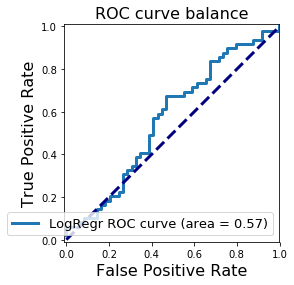

In [41]:
## https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y,prob_y_2)
roc_auc = auc(fpr,tpr)
print("roc_auc:",roc_auc)
print("###################################")

import matplotlib.pyplot as plt
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve balance', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


In [36]:
###So how did this model (trained on the down-sampled dataset) do in terms of AUROC?
print("roc_auc_score::", roc_auc_score(y,prob_y_2))


roc_auc_score:: 0.568096626406


Ok... and how does this compare to the original model trained on the imbalanced dataset?

In [37]:
prob_y_0 = clf_0.predict_proba(X)
prob_y_0 = [p[1] for p in prob_y_0]
print("roc_auc_score::", roc_auc_score(y,prob_y_0))

roc_auc_score:: 0.474802165764


4. Penalize Algorithms (Cost-Sensitive Training)

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM:

Support Vector MachinePython
1
from sklearn.svm import SVC
During training, we can use the argument class_weight='balanced'  to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

We also want to include the argument probability=True  if we want to enable probability estimates for SVM algorithms.

Let's train a model using Penalized-SVM on the original imbalanced dataset:



In [55]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis = 1)
print(y.value_counts())

from sklearn.svm import SVC

clf_3 = SVC(kernel='linear',
           class_weight='balanced',#penelize
           probability=True)
clf_3.fit(X,y)
# Predict on training set
pred_y_3 = clf_3.predict(X)

# Is our model still predicting just one class?
print('np.unique(pred_y_3):', np.unique(pred_y_3))

print("accuracy_score:", accuracy_score(y, pred_y_3))

# What about AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]

print("roc_auc_score(y, prob_y_3):", roc_auc_score(y,prob_y_3))

0    576
1     49
Name: balance, dtype: int64
np.unique(pred_y_3): [0 1]
accuracy_score: 0.688
roc_auc_score(y, prob_y_3): 0.4694763322


In [61]:
### lets apply Grid search in SVC
from sklearn.model_selection import GridSearchCV
clf_GS = SVC();
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear','rbf']
params_grid = {'kernel': kernels, 'C': Cs, 'gamma' : gammas}

grid_search_acc = GridSearchCV(clf_GS, param_grid = params_grid, scoring='accuracy', n_jobs = -1,verbose =2  )
grid_search_acc.fit(X,y)

print('Grid best parameter(accuracy)::', grid_search_acc.best_params_)
print('Grid best score(accuracy):', grid_search_acc.best_score_)

print("#######################################################################################################")

grid_search_roc = GridSearchCV(clf_GS, param_grid = params_grid, scoring='roc_auc', n_jobs = -1,verbose = 1 )

grid_search_roc.fit(X,y)

print('Grid best parameter(roc)::', grid_search_roc.best_params_)
print('Grid best score(roc):', grid_search_roc.best_score_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.9s finished


Grid best parameter(accuracy):: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Grid best score(accuracy): 0.9216
#######################################################################################################
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Grid best parameter(roc):: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Grid best score(roc): 0.887324509804


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.4s finished


#####################################################################
5. Use Tree-Based Algorithms

The final tactic we'll consider is using tree-based algorithms. Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we'll jump right into those:

In [46]:
from sklearn.ensemble import RandomForestClassifier
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
print("y.value_counts():", y.value_counts())

clf_4 = RandomForestClassifier().fit(X,y)
# Predict on training set
pred_y_4 = clf_4.predict(X)
# Is our model still predicting just one class?
print('np.unique( pred_y_4 )::', np.unique( pred_y_4 ) )

# How's our accuracy?
print('accuracy_score(y,pred_y_4):',accuracy_score(y,pred_y_4))

# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 =[p[1] for p in prob_y_4]
print('roc_auc_score(y, prob_y_4):',roc_auc_score(y, prob_y_4))


y.value_counts(): 0    576
1     49
Name: balance, dtype: int64
np.unique( pred_y_4 ):: [0 1]
accuracy_score(y,pred_y_4): 0.9792
roc_auc_score(y, prob_y_4): 0.999415391156
